In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import json
import sys
import seaborn as sns

In [2]:
# name of source video and paths
video = 'vlc-record-2021-04-07-19h31m51s-20201031-1_T2S1.asf-'
input_vidpath = '/home/angela/Documents/tracking_topo/' + video + '.avi'

In [3]:
'''This is lazy but normally have a file where I have all the trial info and get the trial names from there'''
trial = 'test1'

'''Change this path'''
npz_path = '/home/angela/Documents/tracking_topo/data/'

fs = 30 ### framerate 
nummice = 1 ### num individuals
tracks = []
df_ = []


'''This is what is relevant to load data from TRex and make pandas dataframe'''
#for fishid in range(numfish):
'''loop thorough each individual output'''
track = npz_path + trial +  '_fish0.npz'

'''Load info from TRex'''
key_list = ['time','frame','X','Y','X#wcentroid','Y#wcentroid','BORDER_DISTANCE#pcentroid','SPEED#wcentroid','ACCELERATION#wcentroid']

mapped_data = []
with np.load(track) as data:
    m = {}

    for k in key_list:
        m[k] = data[k]
    mapped_data.append(m)

'''create dataframe'''
df = pd.DataFrame(mapped_data[0])

df = df.rename(columns={'X#wcentroid': 'x','Y#wcentroid': 'y','SPEED#wcentroid': 'speed','ACCELERATION#wcentroid': 'acceleration'})
'''Interpolate nans for x and y'''

df['x'] = df['x'].interpolate(method = "linear")
df['y'] = df['y'].interpolate(method = "linear")

df.loc[df['speed']>50] = np.nan




In [4]:
# df_tmp
center_objects = [[424,242],[741,238],[737,595],[415,604]]
cm_to_px = 0.023438

In [5]:
position_objects = np.array(np.multiply(center_objects,cm_to_px))

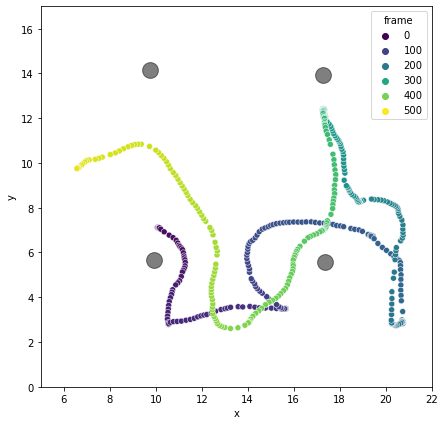

In [6]:
plt.figure(figsize=(7,7))
# plt.plot(df_tmp.x,df_tmp.y)
sns.scatterplot(x='x',y='y',hue='frame',data = df,palette = 'viridis')
# sns.scatterplot(x='X',y='Y',hue='frame',data = df_tmp)
plt.scatter(position_objects[:,0],position_objects[:,1],color='k',s=250,alpha=0.5)
# plt.scatter(472*cm_to_px,231*cm_to_px,color='k',s = 150)
plt.xlim(5,22)
plt.ylim(0,17)
plt.savefig('/home/angela/Documents/tracking_topo/figs/tracking1.png')

In [7]:
# import cv2

In [8]:
# cap = cv2.VideoCapture(input_vidpath)
# ret, img = cap.read()

# ## Select ROI on image and press enter (roi is a tuple of format: x0, y0, width, height)
# roi1 = cv2.selectROI('test', img,False,False)

# cv2.waitKey(27)
# cv2.destroyAllWindows()

In [9]:
# roi1_cm = np.multiply(roi,cm_to_px)

In [10]:
# ## Get proportion of total time spent in selected ROI
# prop = len(df[(df['x'] > roi_cm[0]-3) & (df['x'] < roi_cm[0]+3) & (df['y'] > roi_cm[1]+3) & (df['y'] < roi[1]-3)]) / len(df)
# print('----- The fish spent ' + str(prop*100) + '% of its time in the selected region of interest -----')

In [11]:
## Get proportion of total time spent in selected ROI
radius = 3

roi1 = 0
roi2 = 1
roi3 = 2
roi4 = 3

prop_roi1 = len(df[(df['x'] > position_objects[roi1][0]-radius) & (df['x'] < position_objects[roi1][0]+radius) & (df['y'] > position_objects[roi1][1]-radius) & (df['y'] < position_objects[roi1][1]+radius)]) / len(df)
print('----- The mouse spent ' + str(prop_roi1*100) + '% of its time in the selected region of interest ' +str(roi1))

prop_roi2 = len(df[(df['x'] > position_objects[roi2][0]-radius) & (df['x'] < position_objects[roi2][0]+radius) & (df['y'] > position_objects[roi2][1]-radius) & (df['y'] < position_objects[roi2][1]+radius)]) / len(df)
print('----- The mouse spent ' + str(prop_roi2*100) + '% of its time in the selected region of interest '+str(roi2))

prop_roi3 = len(df[(df['x'] > position_objects[roi3][0]-radius) & (df['x'] < position_objects[roi3][0]+radius) & (df['y'] > position_objects[roi3][1]-radius) & (df['y'] < position_objects[roi3][1]+radius)]) / len(df)
print('----- The mouse spent ' + str(prop_roi3*100) + '% of its time in the selected region of interest ' +str(roi3))

prop_roi4 = len(df[(df['x'] > position_objects[roi4][0]-radius) & (df['x'] < position_objects[roi4][0]+radius) & (df['y'] > position_objects[roi4][1]-radius) & (df['y'] < position_objects[roi4][1]+radius)]) / len(df)
print('----- The mouse spent ' + str(prop_roi4*100) + '% of its time in the selected region of interest ' +str(roi4))


----- The mouse spent 20.675944333996025% of its time in the selected region of interest 0
----- The mouse spent 30.61630218687873% of its time in the selected region of interest 1
----- The mouse spent 15.705765407554672% of its time in the selected region of interest 2
----- The mouse spent 0.0% of its time in the selected region of interest 3


Text(0, 0.5, 'speed')

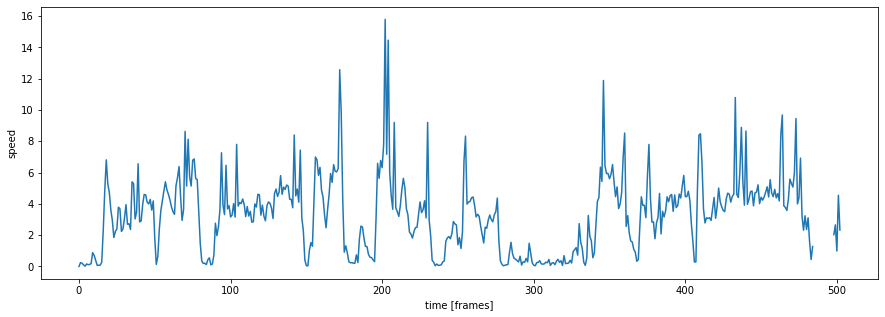

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df.frame,df.speed)
plt.xlabel('time [frames]')
plt.ylabel('speed')